In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [30]:
df = pd.read_csv('50_Startups.csv')
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [16]:
#splitting feature and target
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [17]:
#encoding categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers = [ ('encoder' , OneHotEncoder() , [3])] , remainder = 'passthrough')
x = np.array(ct.fit_transform(x))


In [18]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 , random_state=42)

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [22]:
y_pred = model.predict(x_test)

In [34]:
pred_df = {'Predictions': y_pred, 'Actual': y_test}  # Dictionary with columns
pred_df = pd.DataFrame(pred_df)
pred_df

,Predictions,Actual
0,126362.879083,134307.35
1,84608.453836,81005.76
2,99677.494252,99937.59
3,46357.460686,64926.08
4,128750.482885,125370.37
5,50912.417419,35673.41
6,109741.350327,105733.54
7,100643.242816,107404.34
8,97599.275746,97427.84
9,113097.425244,122776.86


<Axes: xlabel='Predictions', ylabel='Actual'>

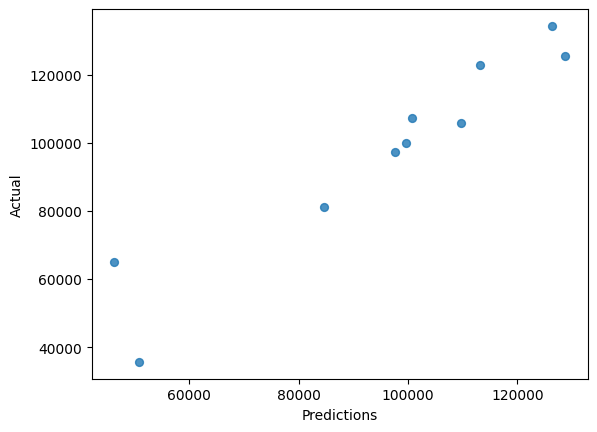

In [33]:
from matplotlib import pyplot as plt
pred_df.plot(kind='scatter', x='Predictions', y='Actual', s=32, alpha=.8)